In [19]:
import os
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader, BaselineOnly, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
DATASET_DIR = "dataset"
GAMES_CSV = os.path.join(DATASET_DIR, "games.csv")
USERS_CSV = os.path.join(DATASET_DIR, "users.csv")
RECOMMENDATIONS_CSV = os.path.join(DATASET_DIR, "recommendations.csv")
dataset_size = 500_000

In [32]:
games_pd = pd.read_csv(GAMES_CSV)
new_games_pd = games_pd[games_pd["date_release"] > "2022-01-01"]
new_games_pd.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
32,1872790,Luckitown,2022-01-19,True,True,False,Very Positive,86,163,4.99,4.99,0.0,True
45,402710,Osiris: New Dawn,2023-01-18,True,False,False,Mixed,57,12322,19.99,19.99,0.0,True
143,498310,RPG in a Box,2022-05-10,True,True,False,Very Positive,92,153,29.99,29.99,0.0,True
165,580640,End State,2022-12-01,True,False,False,Mostly Positive,72,80,19.99,19.99,0.0,True
199,826540,Audio Trip,2022-12-19,True,False,False,Very Positive,89,224,19.99,19.99,0.0,True


In [39]:
recommendations = pd.read_csv(RECOMMENDATIONS_CSV)
recs_pd = recommendations[recommendations["app_id"].isin(new_games_pd["app_id"])]
recs_pd.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
11,1086940,0,0,2020-10-07,True,50.0,85822,11
12,1938090,0,0,2022-11-16,True,46.7,161081,12
21,1938090,0,0,2022-11-23,True,7.4,664486,21
22,534380,0,0,2022-10-08,True,40.6,22793,22


In [34]:
recs_pd.count()

app_id            3482655
helpful           3482655
funny             3482655
date              3482655
is_recommended    3482655
hours             3482655
user_id           3482655
review_id         3482655
dtype: int64

In [27]:
games_in_recs.count()

app_id            13894
title             13894
date_release      13894
win               13894
mac               13894
linux             13894
rating            13894
positive_ratio    13894
user_reviews      13894
price_final       13894
price_original    13894
discount          13894
steam_deck        13894
dtype: int64

In [44]:
new_games_pd[new_games_pd["app_id"] == 580640]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
165,580640,End State,2022-12-01,True,False,False,Mostly Positive,72,80,19.99,19.99,0.0,True


In [45]:
recs_pd[recs_pd["app_id"] == 580640]

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
11160361,580640,5,0,2022-12-28,True,11.5,492235,11160361
11162691,580640,0,0,2022-12-01,True,3.0,12167818,11162691
11168894,580640,0,2,2022-12-05,True,0.2,9542230,11168894
11169751,580640,0,0,2022-12-28,True,19.7,4858265,11169751
11171625,580640,11,0,2022-12-03,False,0.6,11770134,11171625
11171626,580640,0,0,2022-12-12,True,11.3,4755401,11171626
11173551,580640,5,0,2022-12-02,False,1.2,10844600,11173551
11174101,580640,0,0,2022-12-19,True,5.8,8252108,11174101
11175986,580640,2,0,2022-12-01,True,12.8,10757497,11175986
11178996,580640,21,16,2022-12-01,True,1.1,11702922,11178996


In [47]:
users = pd.read_csv(USERS_CSV)
users_pd = users[users["user_id"].isin(recs_pd["user_id"])]
print(users_pd.count())
users_pd.head()

user_id     2567237
products    2567237
reviews     2567237
dtype: int64


,user_id,products,reviews
2,8762579,329,4
4,5167327,98,2
14,10184828,187,1
16,11237958,12,1
17,11274058,102,4


In [48]:
recs_pd["hours"].describe()

count    3.482655e+06
mean     7.428700e+01
std      1.280394e+02
min      0.000000e+00
25%      7.500000e+00
50%      2.580000e+01
75%      8.020000e+01
max      1.000000e+03
Name: hours, dtype: float64

In [59]:
recs_pd = recs_pd.copy()
recs_pd["rating"] = (recs_pd["is_recommended"].astype(int) * 8
                        + np.log1p(recs_pd["hours"])
                        )

#Normalize rating
recs_pd["rating"] = ((recs_pd["rating"] - recs_pd["rating"].min()) /
                    (recs_pd["rating"].max() - recs_pd["rating"].min()))

In [60]:
recs_pd["is_recommended"].astype(int).describe()

count    3.482655e+06
mean     8.093279e-01
std      3.928311e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: is_recommended, dtype: float64

<Axes: >

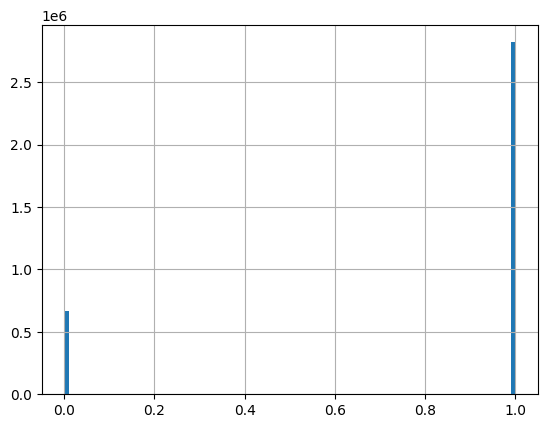

In [61]:
recs_pd["is_recommended"].astype(int).hist(bins=100)

<Axes: >

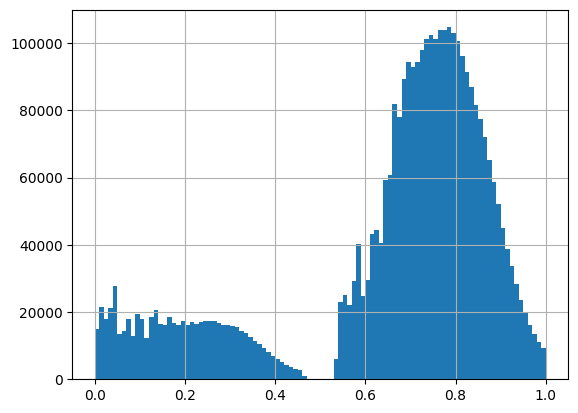

In [62]:
recs_pd["rating"].hist(bins=100)

In [63]:
recs_df = recs_pd[["user_id", "app_id", "rating"]]

In [64]:
reader = Reader(rating_scale=(0,1))
data = Dataset.load_from_df(recs_df, reader)

In [65]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [67]:
models = {
    "Baseline": BaselineOnly(),
    "ItemKNN": KNNBasic(sim_options={"user_based": False}),
    "SVD": SVD(random_state=42),
}

for name, model in models.items():
    model.fit(train)
    preds = model.test(test)
    print(f'{name}: MSRE: {accuracy.rmse(preds)}, MAE: {accuracy.mae(preds)}' )
    print('\n')
    

Estimating biases using als...
RMSE: 0.2187
MAE:  0.1577
Baseline: MSRE: 0.21867449416173276, MAE: 0.1576825968789728


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.2595
MAE:  0.1926
UserKNN: MSRE: 0.25952877988009115, MAE: 0.19259555329834369


RMSE: 0.2193
MAE:  0.1562
SVD: MSRE: 0.21929039437186154, MAE: 0.15616921242125112




In [68]:
def recommend_games(user_id, model, games_df, ratings_df, n=10):
    played_games = set(
        ratings_df[ratings_df["user_id"] == user_id]["app_id"]
    )

    all_games = games_df["app_id"].unique()

    predictions = []
    for game_id in all_games:
        if game_id not in played_games:
            pred = model.predict(user_id, game_id)
            predictions.append((game_id, pred.est))

    predictions.sort(key=lambda x: x[1], reverse=True)
    top_n = predictions[:n]

    result = pd.DataFrame(top_n, columns=["app_id", "predicted_rating"])
    return result.merge(games_df[["app_id", "title"]], on="app_id")


In [69]:
recommend_games(10, models["Baseline"], games_pd, recs_df)

,app_id,predicted_rating,title
0,1245620,0.821070,ELDEN RING
1,1535560,0.819532,Farmer Against Potatoes Idle
2,1687950,0.816086,Persona 5 Royal
3,1960270,0.814670,Lootun
4,877280,0.814484,SAO Utils 2: Progressive
5,1904540,0.809141,Football Manager 2023
6,1401590,0.798469,Disney Dreamlight Valley
7,1863750,0.797584,挂机神话
8,261550,0.794571,Mount & Blade II: Bannerlord
9,1877960,0.794462,Trimps


In [99]:
def get_user_history(user_id, trainset, games_metadata):
    try:
        inner_user_id = trainset.to_inner_uid(user_id)
    except ValueError:
        return []

    user_ratings = trainset.ur[inner_user_id]
    
    history = []
    for inner_item_id, rating in user_ratings:
        raw_app_id = trainset.to_raw_iid(inner_item_id)
        
        # Get Title
        game_info = games_metadata[games_metadata['app_id'] == raw_app_id]
        if not game_info.empty:
            title = game_info.iloc[0]['title']
        else:
            title = "Unknown Title"
            
        history.append((title, raw_app_id, rating))
    
    history.sort(key=lambda x: x[2], reverse=True)
    return history

test_user_id = recs_pd['user_id'].iloc[34] 
history = get_user_history(test_user_id, train, games_pd)

print(f"--- User {test_user_id} rated {len(history)} games ---")
for title, app_id, rating in history[:10]:
    print(f"[{app_id}] {title} (Actual Rating: {rating:.4f})")

print("\n" + "="*80 + "\n")

recs = get_svd_recs(test_user_id, model, train, games_pd, top_n=10)

print(f"--- Recommended for User {test_user_id} ---")
for title, app_id, rating in recs:
    print(f"[{app_id}] {title} (Predicted Rating: {rating:.4f})")

--- User 12104501 rated 4 games ---
[602960] Barotrauma (Actual Rating: 0.9937)
[975370] Dwarf Fortress (Actual Rating: 0.7102)
[1361210] Warhammer 40000: Darktide (Actual Rating: 0.3431)
[1938090] Call of Duty® (Actual Rating: 0.2995)


--- Recommended for User 12104501 ---
[1895860] Monster Girls and the Mysterious Adventure 2 (Predicted Rating: 0.9565)
[1734250] Triple Take (Predicted Rating: 0.9513)
[2006700] impossiBot (Predicted Rating: 0.9493)
[1595020] Otteretto (Predicted Rating: 0.9201)
[1997830] GUTTER: The Cursed (Predicted Rating: 0.9174)
[2218370] Thunderbolt Poker (Predicted Rating: 0.9006)
[1915240] Sparkle Milla: Eight Genetic Abnormalities and a Blood Ghost (Predicted Rating: 0.8888)
[1935790] Haunted Hotel: The Thirteenth Collector's Edition (Predicted Rating: 0.8879)
[1403400] Sky Squadron (Predicted Rating: 0.8873)
[1675530] Turbeton (Predicted Rating: 0.8749)
